ㄴ# 실습 준비

## Google Driver와 Colab 연동

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## 실행위치 이동

In [0]:
# 현재 위치
!pwd

# 실행 위치 이동
%cd "/content/gdrive/My Drive/04_영상인식_copied/CH678"

# 이동된 위치 확인
!pwd
!ls -al


/content
/content/gdrive/My Drive/04_영상인식_copied/CH678
/content/gdrive/My Drive/04_영상인식_copied/CH678
total 19094
drwx------ 2 root root     4096 Aug  5 06:58 data
drwx------ 2 root root     4096 Aug  5 06:58 .ipynb_checkpoints
drwx------ 9 root root     4096 Aug  5 06:57 keras-yolo3
-rw------- 1 root root  7705903 Aug  5 06:59 Keras_Yolov3_190211_v3.ipynb
-rw------- 1 root root 11282937 Aug  5 06:59 Keras_Yolov3_190211_v4.ipynb
-rw------- 1 root root   550010 Aug 15 13:35 Keras_Yolov3_190212_v5.ipynb


# 미리 학습된 Yolov3 모델 사용하여 object detection

## 1. Yolov3 소스코드


*   원본 주소 : https://github.com/qqwweee/keras-yolo3.git

In [0]:
!pwd
!ls -al

/content/gdrive/My Drive/04_영상인식_copied/CH678
total 19094
drwx------ 2 root root     4096 Aug  5 06:58 data
drwx------ 2 root root     4096 Aug  5 06:58 .ipynb_checkpoints
drwx------ 9 root root     4096 Aug  5 06:57 keras-yolo3
-rw------- 1 root root  7705903 Aug  5 06:59 Keras_Yolov3_190211_v3.ipynb
-rw------- 1 root root 11282937 Aug  5 06:59 Keras_Yolov3_190211_v4.ipynb
-rw------- 1 root root   550010 Aug 15 13:35 Keras_Yolov3_190212_v5.ipynb


## 2. Convert Keras Model - Yolov3

- convert.py로 Yolo 모델을 Keras 모델로 변환(모델정보 출력)
- coco dataset으로 Pretrain한 모델

 - yolov3.cfg : Darknet yolov3 모델의 Layer

 - yolov3.weight : Darknet yolov3 모델의 weight
 
 - yolo.h5 : Darknet yolov3 모델을 keras 모델로 변환한 대용량 파일

In [0]:
# 실행 위치 이동
%cd keras-yolo3

# 이동된 위치 확인
!pwd
!ls -al

/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
total 242969
-rw------- 1 root root      1323 Aug  5 06:57 coco_annotation.py
-rw------- 1 root root     10093 Aug  5 06:57 convert.py
-rw------- 1 root root      5707 Aug  5 06:58 darknet53.cfg
-rw------- 1 root root      8316 Aug 15 09:14 edit_train.py
drwx------ 2 root root      4096 Aug  5 06:57 font
drwx------ 2 root root      4096 Aug  5 06:57 .git
-rw------- 1 root root      1201 Aug  5 06:57 .gitignore
drwx------ 2 root root      4096 Aug  5 06:58 .ipynb_checkpoints
-rw------- 1 root root    460800 Aug  5 06:58 keras-yolo3
-rw------- 1 root root      3482 Aug  5 06:58 kmeans.py
-rw------- 1 root root      1064 Aug  5 06:57 LICENSE
drwx------ 3 root root      4096 Aug 15 08:43 logs
drwx------ 2 root root      4096 Aug 15 13:34 model_data
drwx------ 2 root root      4096 Aug 12 03:46 __pycache__
-rw------- 1 root root      4077 Aug  5 06:57 README.md

In [0]:
# 실행하기전 model_data 폴더하위에 기존것이 있다면 삭제
!rm -rf model_data/yolo.h5

# 실행 
%run convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
W0815 13:37:31.883552 139691092273024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 13:37:31.906422 139691092273024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 13:37:31.912127 139691092273024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0815 13:37:31.931740 139691092273024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0815 

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)


W0815 13:37:32.557384 139691092273024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsing section convolutional_12
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_13
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_4
Parsing section convolution

W0815 13:38:29.966693 139691092273024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



Parsing section upsample_0
Parsing section route_1
Concatenating route layers: [<tf.Tensor 'up_sampling2d_1/ResizeNearestNeighbor:0' shape=(?, ?, ?, 256) dtype=float32>, <tf.Tensor 'add_19/add:0' shape=(?, ?, ?, 512) dtype=float32>]
Parsing section convolutional_60
conv2d bn leaky (1, 1, 768, 256)
Parsing section convolutional_61
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_62
conv2d bn leaky (1, 1, 512, 256)
Parsing section convolutional_63
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_64
conv2d bn leaky (1, 1, 512, 256)
Parsing section convolutional_65
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_66
conv2d    linear (1, 1, 512, 255)
Parsing section yolo_1
Parsing section route_2
Parsing section convolutional_67
conv2d bn leaky (1, 1, 256, 128)
Parsing section upsample_1
Parsing section route_3
Concatenating route layers: [<tf.Tensor 'up_sampling2d_2/ResizeNearestNeighbor:0' shape=(?, ?, ?, 128) dtype=float32>, <tf.Tensor 'add_11/ad

### 모델구조 이미지화

In [0]:
# 모델 저장한 폴더로 이동
%cd model_data

# 모델 구조 이미지 저장 및 불러오기
from keras.models import load_model
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image, display

model = load_model('yolo.h5')

plot(model, show_shapes=True, to_file='Yolov3.png')
display(Image(filename='Yolov3.png')) 

Output hidden; open in https://colab.research.google.com to view.

## 3. 다운로드 예제 데이터
 - Object Detection할 예제 데이터 다운로드
 - 원본주소 : http://health.chosun.com/site/data/img_dir/2018/01/17/2018011700908_0.jpg
 - ex_img.jpg 파일로 저장되어 있음

In [0]:
# 예제 파일이 있는 폴더로 이동
%cd  /content/gdrive/My Drive/04_영상인식_copied/CH678/data

# 파일 확인
%ls -la

# 파일이 없을 경우 다운로드
!if [ ! -f ex_img.jpg ]; then \
  echo "start download ...."; \
  wget http://health.chosun.com/site/data/img_dir/2018/01/17/2018011700908_0.jpg \
        -O ex_img.jpg; \
fi

/content/gdrive/My Drive/04_영상인식_copied/CH678/data
total 2448310
-rw------- 1 root root    420029 Aug  5 06:58  000017_bndbox.png
-rw------- 1 root root     73696 Aug  5 06:59  example_img.jpg
-rw------- 1 root root    194949 Aug  5 06:58  ex_img.jpg
-rw------- 1 root root 350013440 Aug  5 06:58  Sinsinsa2018.tar
-rw------- 1 root root        23 Aug  5 06:59  Sinsinsa_classes.txt
-rw------- 1 root root   2589096 Aug  5 06:59  ssd7_epoch-10_loss-2.9456_val_loss-2.7692.h5
-rw------- 1 root root     16000 Aug  5 06:58  train.txt
-rw------- 1 root root     11968 Aug  5 06:58 'train.txt 파일구성.png'
-rw------- 1 root root 935945998 Aug  5 06:58  udacity_driving_datasets.zip
-rw------- 1 root root      8000 Aug  5 06:59  validation.txt
-rw------- 1 root root      8000 Aug  5 06:58  val.txt
-rw------- 1 root root 201485128 Aug  5 06:58  VGG_ILSVRC2016_SSD_300x300_iter_440000.h5
-rw------- 1 root root 105246928 Aug  5 06:58  VGG_VOC0712_SSD_300x300_iter_120000.h5
-rw------- 1 root r

## 4. Install library
- 속성(attributes)으로 명령어 값을 작동하게 하는 라이브러리 설치

In [0]:
!pip install easydict

## 5. Object Detection 예제
- Output 셸에 다운로드한 이미지 파일을 입력
 - yolo.h5 : coco dataset으로 Pretrain한 모델
 - anchors : yolov3의 9개의 anchors Box (Pretrained)
 - classes : coco dataset의 80개의 classes

- 샘플 이미지 파일의 경로 입력 /content/gdrive/My Drive/04_영상인식_copied/CH678/data/ex_img.jpg
- end 입력시 종료

/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
Image detection mode
model_data/yolo.h5 model, anchors, and classes loaded.


W0815 13:39:43.903890 139691092273024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Try
(416, 416, 3)
Found 12 boxes for img
dog 0.36 (309, 209) (402, 285)
dog 0.57 (279, 151) (347, 268)
dog 0.88 (2, 133) (68, 284)
dog 0.90 (505, 62) (593, 290)
dog 0.95 (400, 194) (507, 287)
dog 0.96 (146, 133) (243, 286)
dog 0.96 (406, 70) (511, 289)
dog 0.97 (329, 100) (423, 226)
dog 0.99 (45, 95) (190, 276)
cat 0.41 (309, 209) (402, 285)
cat 0.48 (504, 40) (592, 298)
cat 0.55 (279, 151) (347, 268)
7.4172864409999875


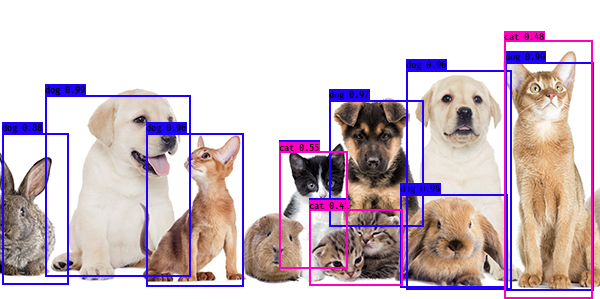

Try else, r_image <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x299 at 0x7F0BB200EDA0>.
Try End


In [0]:
%cd "/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3"
import sys
import argparse
import easydict

# 이미지 보여주기 위한 라이브러리
from IPython.display import display 

# yolo와 PIL 모듈 저장된 경로 sys 경로에 추가
sys.path.append('/content/CH678/keras-yolo3')

from yolo import YOLO, detect_video
from PIL import Image

##
ONESHOT = True

'''

    while True:
        img = input('Input image filename:')
        
        if img =='end':
            break
            
        else:
            try:
                image = Image.open(img)
            except:
                print('Open Error! Try again!')
                continue
            else:
                r_image = yolo.detect_image(image)
                #r_image.show()
                display(r_image)
    
       # yolo.close_session()
'''

## START
# 이미지의 물체 탐색을 위한 함수
def detect_img(yolo):

  if ONESHOT == True:
    
    while True:
        img = '/content/gdrive/My Drive/04_영상인식_copied/CH678/data/ex_img.jpg'
                  
        try:
            image = Image.open(img)
            print('Try')
        except:
            print('Open Error! Try again!')
            continue
        else:
            r_image = yolo.detect_image(image)
            #r_image.show()
            display(r_image)
            print('Try else, r_image {}.'.format(r_image))
    
       # yolo.close_session()      
        print('Try End')
        break;

  else:
    
    while True:
        img = input('Input image filename:')
        
        if img =='end':
            break
            
        else:
            try:
                image = Image.open(img)
                print('Try')
            except:
                print('Open Error! Try again!')
                continue
            else:
                r_image = yolo.detect_image(image)
                #r_image.show()
                display(r_image)
    
       # yolo.close_session()    
## END

FLAGS = None

# 속성 형식으로 명령어 전달 : 모델 위치, anchors 위치, class 위치등 
args=easydict.EasyDict( {
            'model':    YOLO.get_defaults("model_path")
           ,'anchors': YOLO.get_defaults("anchors_path")
           ,'classes': YOLO.get_defaults("classes_path")
#           ,'gpu_num': str(YOLO.get_defaults("gpu_num"))
           ,'image' : 'a'
        })


# 실행
FLAGS = args
print("Image detection mode")
detect_img(YOLO(**vars(FLAGS)))

# 전이학습
- 이미 학습되어 있는 Yolov3로 새로운 데이터를 학습한다.
- voc dataset 이용

## 1. Download Train Dataset
- Pascal Visual Object Classes dataset
 - 객체 클래스 인식을 위한 표준화된 이미지 셋과 주석(Annotation) 제공
 - 2008년 이후로는 Annotation이 제공되지 않으므로 2007년 Dataset을 사용한다.
 - 원본 : https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
 - 원본 : https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
 - 압축을 풀면 VOCdevkit 이라는 dataset 폴더가 생성된다.

In [0]:
# dataset tar파일이 있는 폴더로 이동
%cd /content/gdrive/My Drive/04_영상인식_copied/CH678/data

# 파일 확인
%pwd
%ls -al

# 파일이 없을 경우 다운로드
  # test data
!if [ ! -f VOCtest_06-Nov-2007.tar ]; then \
  echo "start download ...."; \
  wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar \
        -O VOCtest_06-Nov-2007.tar; \
fi

  # train data
!if [ ! -f VOCtrainval_06-Nov-2007.tar ]; then \
  echo "start download ...."; \
  wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar \
        -O VOCtrainval_06-Nov-2007.tar; \
fi 
  

/content/gdrive/My Drive/04_영상인식_copied/CH678/data
total 2448310
-rw------- 1 root root    420029 Aug  5 06:58  000017_bndbox.png
-rw------- 1 root root     73696 Aug  5 06:59  example_img.jpg
-rw------- 1 root root    194949 Aug  5 06:58  ex_img.jpg
-rw------- 1 root root 350013440 Aug  5 06:58  Sinsinsa2018.tar
-rw------- 1 root root        23 Aug  5 06:59  Sinsinsa_classes.txt
-rw------- 1 root root   2589096 Aug  5 06:59  ssd7_epoch-10_loss-2.9456_val_loss-2.7692.h5
-rw------- 1 root root     16000 Aug  5 06:58  train.txt
-rw------- 1 root root     11968 Aug  5 06:58 'train.txt 파일구성.png'
-rw------- 1 root root 935945998 Aug  5 06:58  udacity_driving_datasets.zip
-rw------- 1 root root      8000 Aug  5 06:59  validation.txt
-rw------- 1 root root      8000 Aug  5 06:58  val.txt
-rw------- 1 root root 201485128 Aug  5 06:58  VGG_ILSVRC2016_SSD_300x300_iter_440000.h5
-rw------- 1 root root 105246928 Aug  5 06:58  VGG_VOC0712_SSD_300x300_iter_120000.h5
-rw------- 1 root r

## 2. 압축해제
- 압축해제시 구글 드라이브와의 싱크가 불안정하여 발생되는 이미지 소실을 방지하기 위하여 tmp 파일 밑으로 압축해제
- 모든 런타임 재설정시 dataset은 사라짐
- dataset 압축해제 오랜시간 걸리지 않으므로 이경로로 푸는걸 추천함

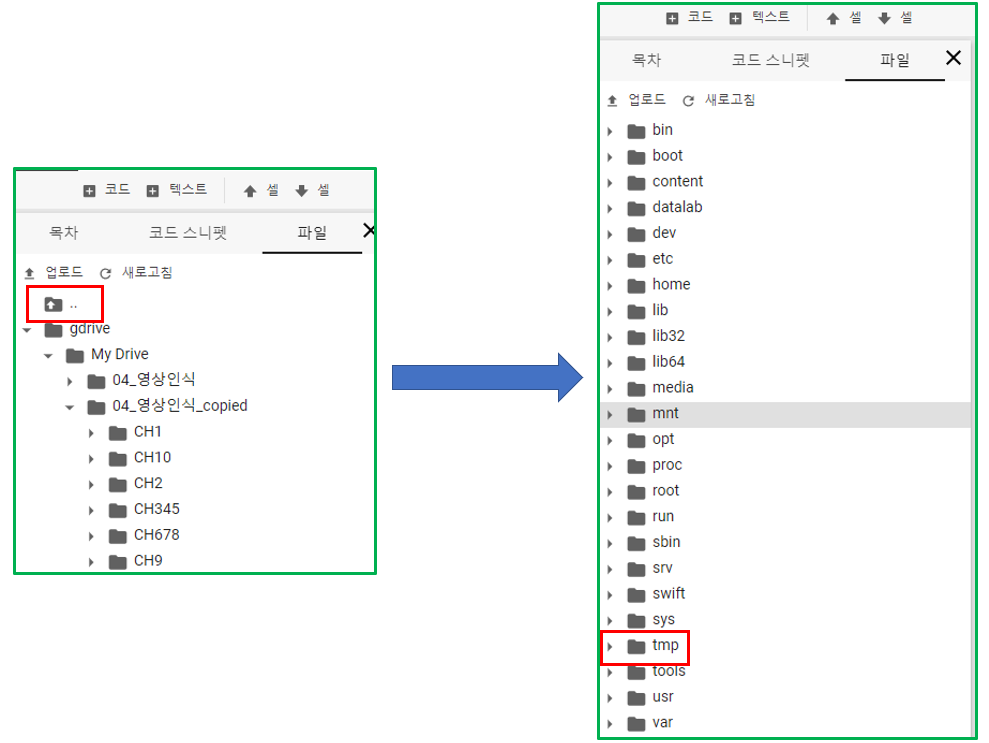

In [0]:
!tar xf VOCtrainval_06-Nov-2007.tar -C /tmp/
!tar xf VOCtest_06-Nov-2007.tar -C /tmp/

In [0]:
# 파일 확인
%cd /tmp/
%pwd
%ls -al

/tmp
total 12
drwxrwxrwt 1 root root 4096 Aug 15 13:40 ./
drwxr-xr-x 1 root root 4096 Aug 15 13:18 ../
srw------- 1 root root    0 Aug 15 13:26 drivefs_ipc.0=
srw------- 1 root root    0 Aug 15 13:26 drivefs_ipc.0_shell=
drwxrwxrwx 3 root root 4096 Nov  6  2007 VOCdevkit/


## 3.  학습을 위한 이미지 정보 생성
- voc_annotation.py로 image파일 경로 + Bounding Box 정보 + Class Index 정보가 있는 txt 파일 생성

In [0]:
# txt파일 저장할 위치로 이동
%cd /tmp

# 위치 및 파일 확인
%pwd
%ls -al

/tmp
total 12
drwxrwxrwt 1 root root 4096 Aug 15 13:40 ./
drwxr-xr-x 1 root root 4096 Aug 15 13:18 ../
srw------- 1 root root    0 Aug 15 13:26 drivefs_ipc.0=
srw------- 1 root root    0 Aug 15 13:26 drivefs_ipc.0_shell=
drwxrwxrwx 3 root root 4096 Nov  6  2007 VOCdevkit/


In [0]:
# 기존 파일 삭제
!rm *.txt

# voc_annotation.py 실행
%run '/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3/voc_annotation.py'

# 파일 확인
%ls -al

rm: cannot remove '*.txt': No such file or directory
total 876
drwxrwxrwt 1 root root   4096 Aug 15 13:40 ./
drwxr-xr-x 1 root root   4096 Aug 15 13:18 ../
-rw-r--r-- 1 root root 433052 Aug 15 13:40 2007_test.txt
-rw-r--r-- 1 root root 222855 Aug 15 13:40 2007_train.txt
-rw-r--r-- 1 root root 223295 Aug 15 13:40 2007_val.txt
srw------- 1 root root      0 Aug 15 13:26 drivefs_ipc.0=
srw------- 1 root root      0 Aug 15 13:26 drivefs_ipc.0_shell=
drwxrwxrwx 3 root root   4096 Nov  6  2007 VOCdevkit/


In [0]:
# 이미지 정보 확인
!head 2007_train.txt

/tmp/VOCdevkit/VOC2007/JPEGImages/000012.jpg 156,97,351,270,6
/tmp/VOCdevkit/VOC2007/JPEGImages/000017.jpg 185,62,279,199,14 90,78,403,336,12
/tmp/VOCdevkit/VOC2007/JPEGImages/000023.jpg 9,230,245,500,1 230,220,334,500,1 2,1,117,369,14 3,2,243,462,14 225,1,334,486,14
/tmp/VOCdevkit/VOC2007/JPEGImages/000026.jpg 90,125,337,212,6
/tmp/VOCdevkit/VOC2007/JPEGImages/000032.jpg 104,78,375,183,0 133,88,197,123,0 195,180,213,229,14 26,189,44,238,14
/tmp/VOCdevkit/VOC2007/JPEGImages/000033.jpg 9,107,499,263,0 421,200,482,226,0 325,188,411,223,0
/tmp/VOCdevkit/VOC2007/JPEGImages/000034.jpg 116,167,360,400,18 141,153,333,229,18
/tmp/VOCdevkit/VOC2007/JPEGImages/000035.jpg 1,96,191,361,14 218,98,465,318,14
/tmp/VOCdevkit/VOC2007/JPEGImages/000036.jpg 27,79,319,344,11
/tmp/VOCdevkit/VOC2007/JPEGImages/000042.jpg 263,32,500,295,18 1,36,235,299,18


In [0]:
# 학습을 위해 2007_train.txt 파일 복사 및 경로 변경
%cp 2007_train.txt  '/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3/2007_train.txt'

# 이동된 파일 확인
%cd /content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3/
%ls -al

/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
total 243187
-rw------- 1 root root    222855 Aug 15 13:40 2007_train.txt
-rw------- 1 root root      1323 Aug  5 06:57 coco_annotation.py
-rw------- 1 root root     10093 Aug  5 06:57 convert.py
-rw------- 1 root root      5707 Aug  5 06:58 darknet53.cfg
-rw------- 1 root root      8316 Aug 15 09:14 edit_train.py
drwx------ 2 root root      4096 Aug  5 06:57 font/
drwx------ 2 root root      4096 Aug  5 06:57 .git/
-rw------- 1 root root      1201 Aug  5 06:57 .gitignore
drwx------ 2 root root      4096 Aug  5 06:58 .ipynb_checkpoints/
-rw------- 1 root root    460800 Aug  5 06:58 keras-yolo3
-rw------- 1 root root      3482 Aug  5 06:58 kmeans.py
-rw------- 1 root root      1064 Aug  5 06:57 LICENSE
drwx------ 3 root root      4096 Aug 15 08:43 logs/
drwx------ 2 root root      4096 Aug 15 13:39 model_data/
drwx------ 2 root root      4096 Aug 12 03:46 __pycache__/
-rw------- 1 root root      4077 Aug  5 06:57 README.m

## 4. 학습을 위한 하이퍼 파라메터 조정
- 원활한 학습을 위해 batch size, epoch, weights_path를 수정 후 edit_train.py로 저장
- colab 성능의 한계로 인한 파라메터 조정
 - class : vocclass(20개)
 - anchors : coco image data set을 통해 만들어진 yolo_anchors 사용
 - batch_size : 32 -> 8
 - epochs : 총 100 -> 10
 - weights : yolo.h5
 - Epoch 1~5 : 뒷부분의 3개의 Layer를 제외한 나머지 Layer를 Freeze한 상태로 학습 --> trained_weights_stage_1.h5
 - Epoch 6~10 : 모든 Layer를 대상으로 학습 --> trained_weights_final.h5

In [0]:
# 실행 폴더로 이동
%cd /content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3

# 파일 확인
%ls 

##
import datetime
print(datetime.datetime.now()) 

/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
2007_train.txt      kmeans.py     train_bottleneck.py  yolov3.cfg
coco_annotation.py  LICENSE       train.py             yolov3-tiny.cfg
convert.py          logs/         train.txt            yolov3.weights
darknet53.cfg       model_data/   voc_annotation.py    yolo_video.py
font/               __pycache__/  yolo3/
keras-yolo3         README.md     yolo.py
2019-08-15 14:22:19.586010


In [0]:
%%file edit_train.py
"""
Retrain the YOLO model for your own dataset.
"""
##
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = '2007_train.txt'
    log_dir = 'logs/000/'
    classes_path = 'model_data/voc_classes.txt'
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # 이미지 input 크기

    # 모델 생성 (darknet53)
    model = create_model(input_shape, anchors, num_classes,
                          freeze_body=2, weights_path='model_data/yolo.h5') 
    # log파일 저장위치
    logging = TensorBoard(log_dir=log_dir)
    
    #체크 포인트 생성
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    
    # 학습률 감소시켜 학습
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    
    # 학습 조기 종료 
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    #데이터셋 train, val 나누기
    val_split = 0.1
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # 처음학습 할 때에는 loss의 안정을 위해 레이어 고정 후 학습
    # 나쁘지 않은 모델을 얻기위한 epoch 및 파라메터 조정
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 8
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=5,   # 5번까지 앞 레이어 파라미터 고정
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        
        # 처음 5번까지 학습한 weight 저장
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

        
    # 모든 레이어 학습
    # 결과가 좋지 않다면 학습은 더 오래 걸림
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # 변화를 주기위한 recompile
        print('Unfreeze all of the layers.')

        batch_size = 8 # unfreezing 된 모델은 더 많은 GPU memory가 요구된다
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=10,  # 6~10번 모든 파라메터 학습
            initial_epoch=5,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        
        # 마지막 학습 weight 저장
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # 더 많은 학습이 필요할 것

# class 정보 가져오기
def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

# anchors박스 정보 가져오기
def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)

# 모델 생성 함수
def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

# data 전처리 
def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

# data 전처리
def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)


# 실행  
if __name__ == '__main__':
    _main()
    


Writing edit_train.py


## 5. train
- VOC 2007 data set으로 학습
- 2500개의 이미지 샘플
- 청크 관련 에러시 ( 리소스 부족으로 인한 에러)
 - 1. 런타임 메뉴의 모든 런타짐 재설정 클릭하여 초기화
 - 2. 드라이브 연결 및 링크 실행
 - 3. 다시 edit_train.py 실행


In [0]:
# 런타임 재설정후 드라이브 연결
from google.colab import drive
#drive.mount('/content/gdrive')

In [0]:
# 학습 실행
%cd /content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
%ls -al

!python edit_train.py

Output hidden; open in https://colab.research.google.com to view.

# 학습한 결과로 Object Detection
- 10번 학습한 trained_weights_final.h5 model과 voc_classes.txt를 적용하여 Predict
  -  anchors : yolov3의 9개의 anchors Box (Pretrained)
  - classes : voc dataset의 20개의 classes
- 이미지 파일은 VOC2007 Test dataset 사용
- tmp 폴더 밑 2007_test.txt 정보
- ex)
 *   /tmp/VOCdevkit/VOC2007/JPEGImages/000049.jpg
 *   /tmp/VOCdevkit/VOC2007/JPEGImages/001552.jpg
 *   /tmp/VOCdevkit/VOC2007/JPEGImages/006054.jpg
 *   /tmp/VOCdevkit/VOC2007/JPEGImages/007404.jpg
 *   /tmp/VOCdevkit/VOC2007/JPEGImages/009067.jpg



In [0]:
%cd "/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3"
import sys
import argparse
import easydict

# 이미지 보여주기 위한 라이브러리
from IPython.display import display 

# yolo와 PIL 모듈 저장된 경로 sys 경로에 추가
sys.path.append('/content/CH678/keras-yolo3')

from yolo import YOLO, detect_video
from PIL import Image

##
ONESHOT = False

'''
# 이미지의 물체 탐색을 위한 함수
def detect_img(yolo):
    while True:
        img = input('Input image filename:')
        
        if img =='end':
            break
            
        else:
            try:
                image = Image.open(img)
            except:
                print('Open Error! Try again!')
                continue
            else:
                r_image = yolo.detect_image(image)
                #r_image.show()
                display(r_image)
    
       # yolo.close_session()
'''

## START
# 이미지의 물체 탐색을 위한 함수
def detect_img(yolo):

  if ONESHOT == True:
    
    while True:
        img = '/content/gdrive/My Drive/04_영상인식_copied/CH678/data/ex_img.jpg'
                  
        try:
            image = Image.open(img)
            print('Try')
        except:
            print('Open Error! Try again!')
            continue
        else:
            r_image = yolo.detect_image(image)
            #r_image.show()
            display(r_image)
            print('Try else, r_image {}.'.format(r_image))
    
       # yolo.close_session()      
        print('Try End')
        break;

  else:
    
    while True:
        img = input('Input image filename:')
        
        if img =='end':
            break
            
        else:
            try:
                image = Image.open(img)
            except:
                print('Open Error! Try again!')
                continue
            else:
                r_image = yolo.detect_image(image)
                #r_image.show()
                display(r_image)
    
       # yolo.close_session()

## END

FLAGS = None

# 속성 형식으로 명령어 전달 : 모델 위치, anchors 위치, class 위치등 
args=easydict.EasyDict( {
            'model_path': '/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3/logs/000/trained_weights_final.h5'
#            'model':    YOLO.get_defaults("model_path")
           ,'anchors': YOLO.get_defaults("anchors_path")
           ,'classes_path': '/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3/model_data/voc_classes.txt'
#           ,'classes': YOLO.get_defaults("classes_path")
#           ,'gpu_num': str(YOLO.get_defaults("gpu_num"))
           ,'image' : 'a'
        })

FLAGS = args
print("Image detection mode")
detect_img(YOLO(**vars(FLAGS)))

/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
Image detection mode


OSError: ignored

# 전이학습 모델 추가 학습
- 위의 학습결과 trained_weights_final.h5를 가지고 freeze한 layer 없이 36번더 학습한 결과(학습장비 : GPU : TITAN Xp)
- 50번 학습예정이었으나 loss의 변동이 별로 없어 학습 종료


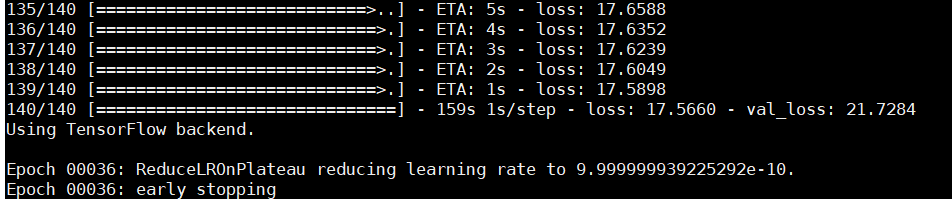

 *   /tmp/VOCdevkit/VOC2007/JPEGImages/000049.jpg
 *   /tmp/VOCdevkit/VOC2007/JPEGImages/001552.jpg
 *   /tmp/VOCdevkit/VOC2007/JPEGImages/006054.jpg
 *   /tmp/VOCdevkit/VOC2007/JPEGImages/007404.jpg
 *   /tmp/VOCdevkit/VOC2007/JPEGImages/009067.jpg



In [0]:
%cd "/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3"
import sys
import argparse
import easydict

# 이미지 보여주기 위한 라이브러리
from IPython.display import display 

# yolo와 PIL 모듈 저장된 경로 sys 경로에 추가
sys.path.append('/content/CH678/keras-yolo3')

from yolo import YOLO, detect_video
from PIL import Image

# 이미지의 물체 탐색을 위한 함수
def detect_img(yolo):
    while True:
        img = input('Input image filename:')
        
        if img =='end':
            break
            
        else:
            try:
                image = Image.open(img)
            except:
                print('Open Error! Try again!')
                continue
            else:
                r_image = yolo.detect_image(image)
                #r_image.show()
                display(r_image)
    
       # yolo.close_session()

FLAGS = None

# 속성 형식으로 명령어 전달 : 모델 위치, anchors 위치, class 위치등 
args=easydict.EasyDict( {
            'model_path': '/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3/model_data/trained_36_unfreeze.h5'
#            'model':    YOLO.get_defaults("model_path")
           ,'anchors': YOLO.get_defaults("anchors_path")
           ,'classes_path': '/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3/model_data/voc_classes.txt'
#           ,'classes': YOLO.get_defaults("classes_path")
#           ,'gpu_num': str(YOLO.get_defaults("gpu_num"))
           ,'image' : 'a'
        })

FLAGS = args
print("Image detection mode")
detect_img(YOLO(**vars(FLAGS)))